In [372]:
import datetime
from datetime import date
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Dataset Information

This dataset contains information about customers of a marketing company. Each row represents a single customer, and the columns provide various details about their demographics, purchasing behavior, and campaign responses.

**People:**

* **ID:** Customer's unique identifier. This is likely a primary key and not directly useful for analysis.
* **Year_Birth:** Customer's birth year. Can be used to calculate the customer's age.
* **Education:** Customer's education level. This is a categorical variable.
* **Marital_Status:** Customer's marital status. This is a categorical variable.
* **Income:** Customer's yearly household income. This is a numerical variable.
* **Kidhome:** Number of children in customer's household. This is a numerical variable.
* **Teenhome:** Number of teenagers in customer's household. This is a numerical variable.
* **Dt_Customer:** Date of customer's enrollment with the company. Can be used to calculate how long the customer has been with the company.
* **Recency:** Number of days since customer's last purchase. This is a numerical variable and potentially important for predicting future behavior.
* **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise. This is a binary categorical variable.

**Products:**

* **MntWines:** Amount spent on wine in the last 2 years. This is a numerical variable.
* **MntFruits:** Amount spent on fruits in the last 2 years. This is a numerical variable.
* **MntMeatProducts:** Amount spent on meat in the last 2 years. This is a numerical variable.
* **MntFishProducts:** Amount spent on fish in the last 2 years. This is a numerical variable.
* **MntSweetProducts:** Amount spent on sweets in the last 2 years. This is a numerical variable.
* **MntGoldProds:** Amount spent on gold in the last 2 years. This is a numerical variable.

**Promotion:**

* **NumDealsPurchases:** Number of purchases made with a discount. This is a numerical variable.
* **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise. This is a binary categorical variable.
* **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise. This is a binary categorical variable.
* **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise. This is a binary categorical variable.
* **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise. This is a binary categorical variable.
* **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise. This is a binary categorical variable.
* **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise. This is a binary categorical variable and could be a target variable for predicting campaign success.

**Place:**

* **NumWebPurchases:** Number of purchases made through the company’s website. This is a numerical variable.
* **NumCatalogPurchases:** Number of purchases made using a catalogue. This is a numerical variable.
* **NumStorePurchases:** Number of purchases made directly in stores. This is a numerical variable.
* **NumWebVisitsMonth:** Number of visits to the company’s website in the last month. This is a numerical variable.



In [374]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [375]:
df.shape

(2240, 29)

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [377]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [378]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [379]:
df.isnull().sum()*100 / len(df)


ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/1386844009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


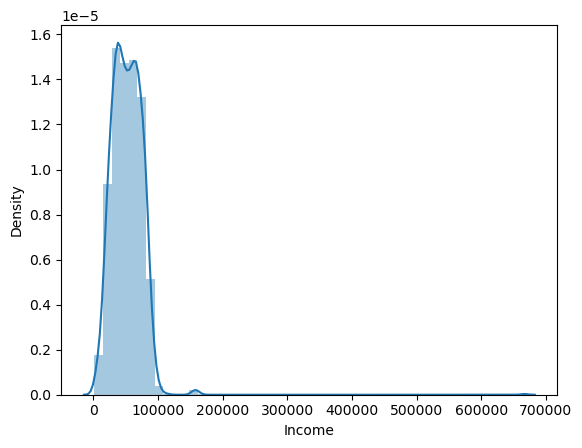

In [380]:
sns.distplot(df['Income'])
plt.show()

#### since the data is left skewed we will replace the missing values with median

In [382]:
df['Income']=df['Income'].fillna(df['Income'].median())

### checking number of unique values in each column

In [384]:
df.nunique() 

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

-- In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why , 

-- they are not going to contribute anything in the model building. So we can drop them.

In [386]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

In [387]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


## Univariate Analysis: 


we look at each variable in our dataset *separately*.** We want to understand the patterns and characteristics of that single variable without considering its relationship with any other variables.

* **Identify data issues:**  unusual entries, or outliers.
* **Understand the distribution:** We can see how the values of a variable are spread out.


### Year_Birth

In [390]:
print("Unique categories present in the Year_Birth:",df["Year_Birth"].value_counts())

Unique categories present in the Year_Birth: Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64


In [391]:
def uni_V(col):
    plt.figure(figsize=(20,8))
    sns.countplot(df[col])
    
    plt.xticks(rotation=90)
    plt.show()

In [392]:
birthyear_counts = df["Year_Birth"].value_counts()
birthyear_percentage = (birthyear_counts / len(df) * 100).round(2)
print(birthyear_percentage)

Year_Birth
1976    3.97
1971    3.88
1975    3.71
1972    3.53
1978    3.44
1970    3.44
1973    3.30
1965    3.30
1969    3.17
1974    3.08
1956    2.46
1958    2.37
1979    2.37
1952    2.32
1977    2.32
1968    2.28
1959    2.28
1966    2.23
1954    2.23
1955    2.19
1960    2.19
1982    2.01
1963    2.01
1967    1.96
1962    1.96
1957    1.92
1951    1.92
1983    1.88
1986    1.88
1964    1.88
1980    1.74
1981    1.74
1984    1.70
1961    1.61
1953    1.56
1985    1.43
1989    1.34
1949    1.34
1950    1.29
1988    1.29
1987    1.21
1948    0.94
1990    0.80
1946    0.71
1947    0.71
1991    0.67
1992    0.58
1945    0.36
1943    0.31
1944    0.31
1993    0.22
1995    0.22
1994    0.13
1996    0.09
1899    0.04
1941    0.04
1893    0.04
1900    0.04
1940    0.04
Name: count, dtype: float64


### To show the frequency of each unique value in that column

In [394]:
def plot_value_counts(df, column_name, color_palette='viridis'):
    value_counts = df[column_name].value_counts()  

    plt.figure(figsize=(12, 6))
    sns.barplot(x=value_counts.index, y=value_counts.values, palette=color_palette)
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.title(f"Distribution of {column_name}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/1161364916.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=color_palette)


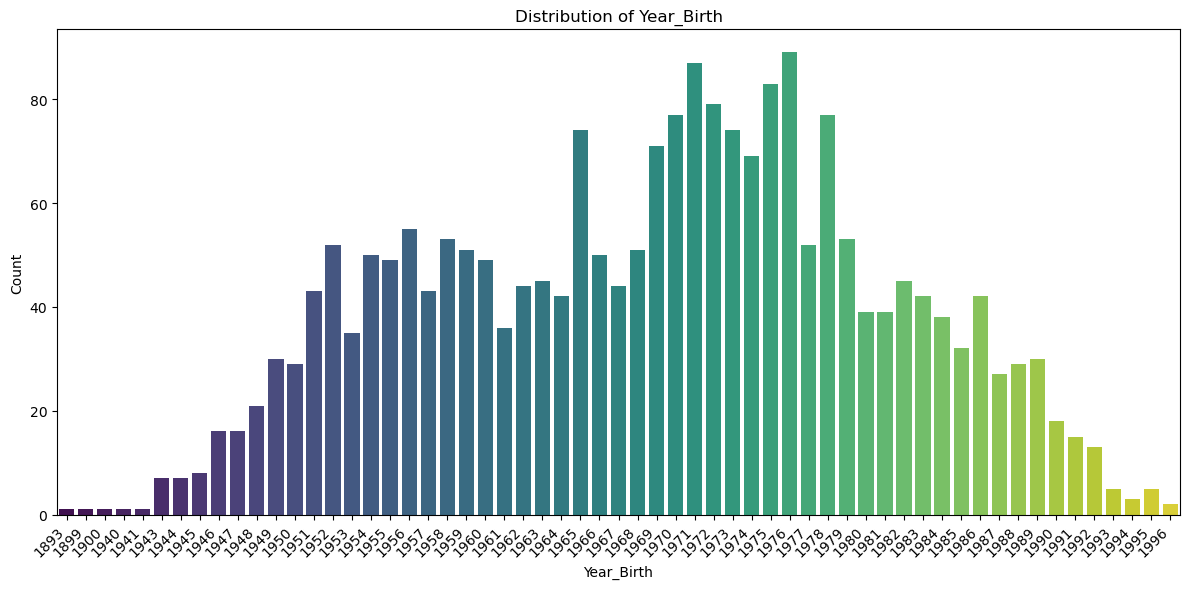

In [395]:
plot_value_counts(df, 'Year_Birth' , color_palette='viridis')

### PERFORMING ANALYSIS ON Education

In [397]:
df["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [398]:
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [399]:
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')

In [400]:
df['Education'].unique()

array(['Post Graduate', 'Under Graduate'], dtype=object)

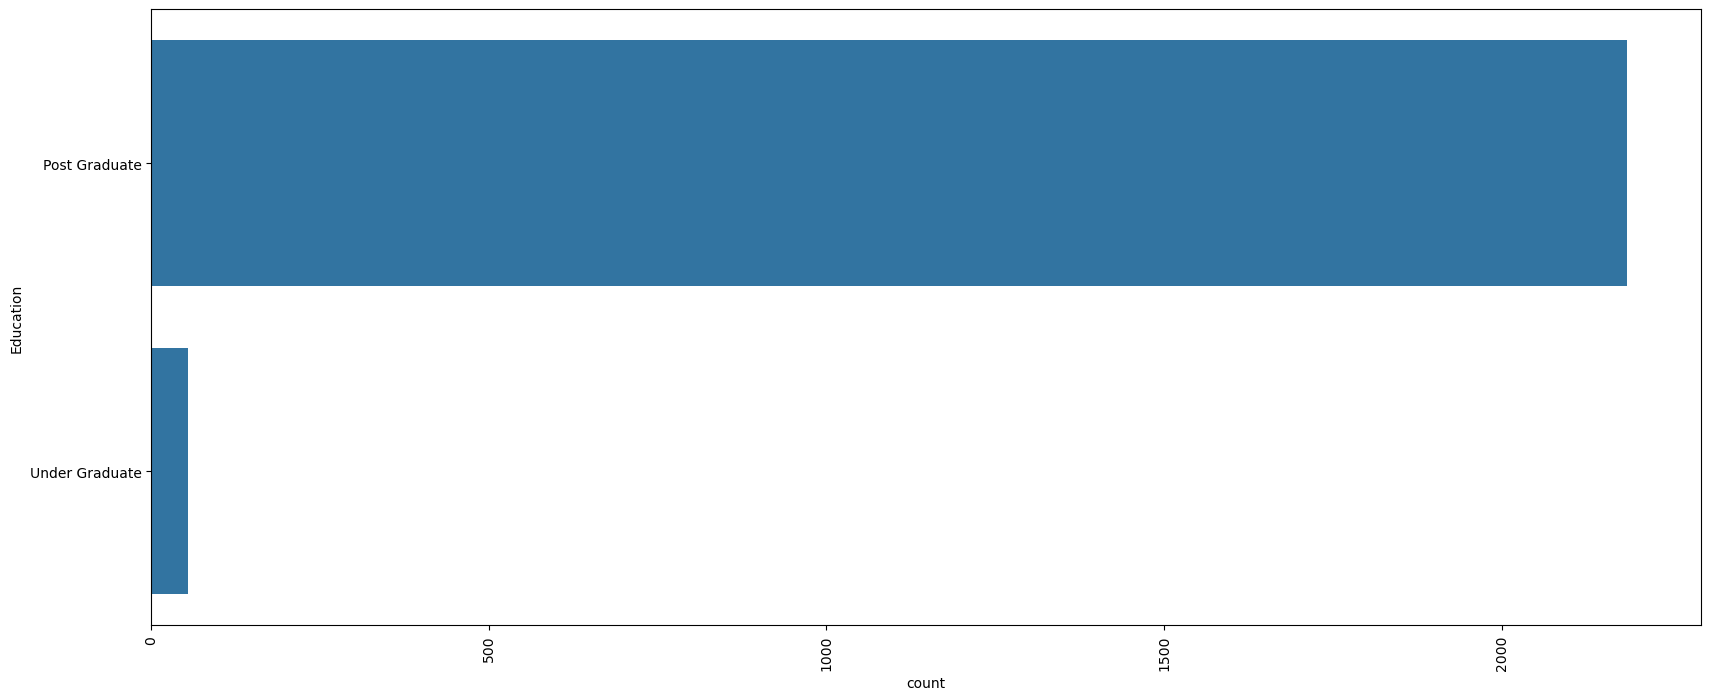

In [401]:
uni_V('Education')

In [402]:
df["Education"].value_counts()

Education
Post Graduate     2186
Under Graduate      54
Name: count, dtype: int64

### PERFORMING ANALYSIS ON Marital_Status

In [404]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [405]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [406]:
df['Marital_Status'] 

0             Single
1             Single
2       Relationship
3       Relationship
4       Relationship
            ...     
2235    Relationship
2236    Relationship
2237          Single
2238    Relationship
2239    Relationship
Name: Marital_Status, Length: 2240, dtype: object

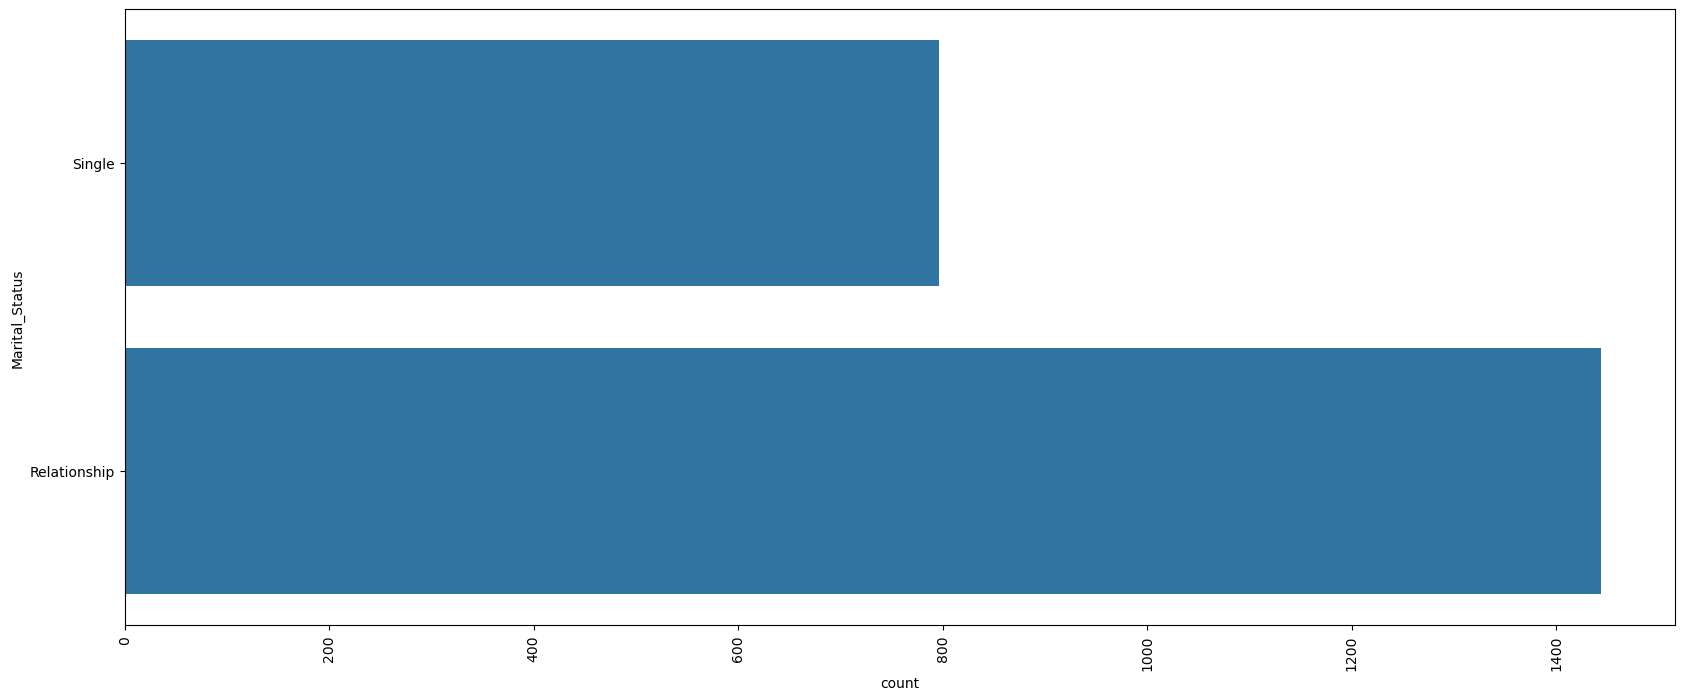

In [407]:
uni_V('Marital_Status')

In [408]:
status_counts = df["Marital_Status"].value_counts()
percentages = status_counts / len(df) * 100
print(percentages)

Marital_Status
Relationship    64.464286
Single          35.535714
Name: count, dtype: float64


### PERFORMING ANALYSIS ON INCOME

In [410]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/933066053.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income"],color = 'turquoise')


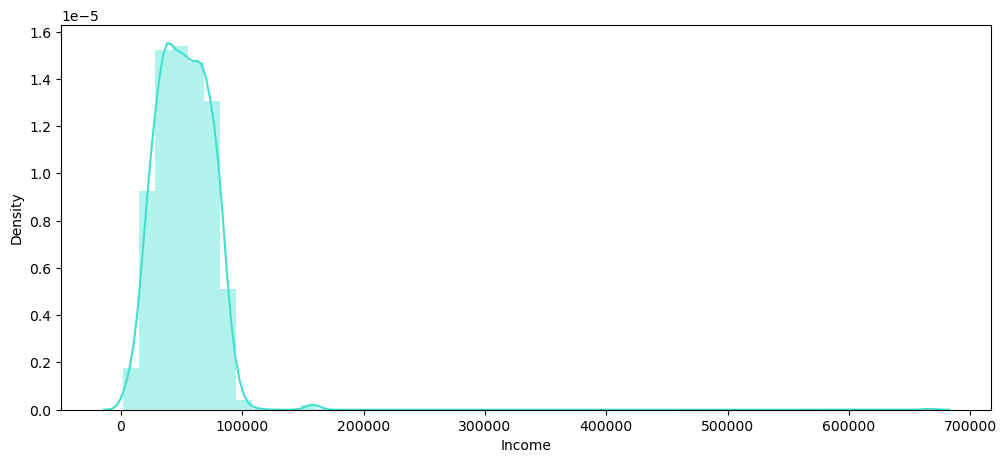

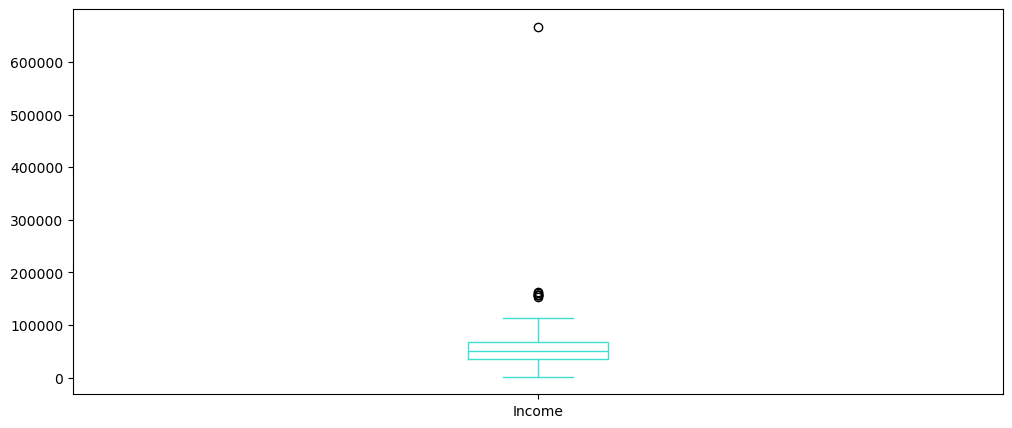

In [411]:
plt.figure(figsize=(12,5))
sns.distplot(df["Income"],color = 'turquoise')
plt.show()
df["Income"].plot.box(figsize=(12,5),color = 'turquoise')
plt.show()

-- THE DATA IS LEFT-SKWEWED 

-- It has some outliers with significantly higher incomes compared to the rest of the dataset

-- We can treat it in later stage while model building

### Analysis On "Kidhome,Teenhome" Variable

** **Kidhome:** Number of children in customer's household. This is a numerical variable.


** **Teenhome:** Number of teenagers in customer's household. This is a numerical variable.

In [415]:
df['Teenhome'].unique()


array([0, 1, 2])

In [416]:
df['Kidhome'].unique()

array([0, 1, 2])

In [417]:
# We can combine different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']

| Index | Teenhome | Kidhome | Kids | 
|-------|----------|---------|------|
| 0     | 0        | 0       | 0    |
| 1     | 1        | 0       | 1    | 
| 2     | 0        | 1       | 1    | 
| 3     | 2        | 1       | 3    | 
| 4     | 1        | 2       | 3    |


In [419]:
kidcounts = df["Kids"].value_counts()
kidpercentage = (kidcounts / len(df) * 100).round(2)
print(kidpercentage)

Kids
1    50.36
0    28.48
2    18.79
3     2.37
Name: count, dtype: float64


### Analysis On "MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds" Variable.

In [421]:
df[['MntFruits','MntMeatProducts']].head()

,MntFruits,MntMeatProducts
0,88,546
1,1,6
2,49,127
3,4,20
4,43,118


In [422]:
df['MntFishProducts'].nunique()

182

### Combining different dataframe into a single column to reduce the number of dimension


In [424]:
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

In [425]:
df['Expenses'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenses, dtype: float64

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/983643119.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Expenses"], color = 'darkorange')


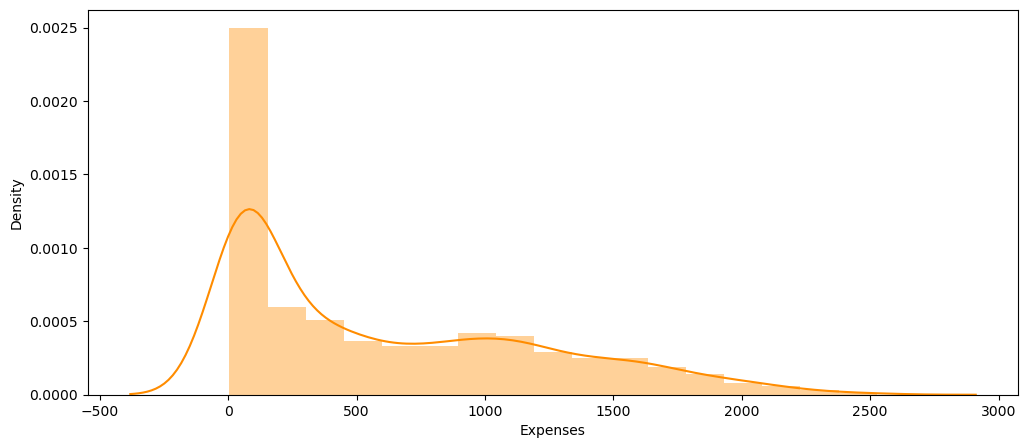

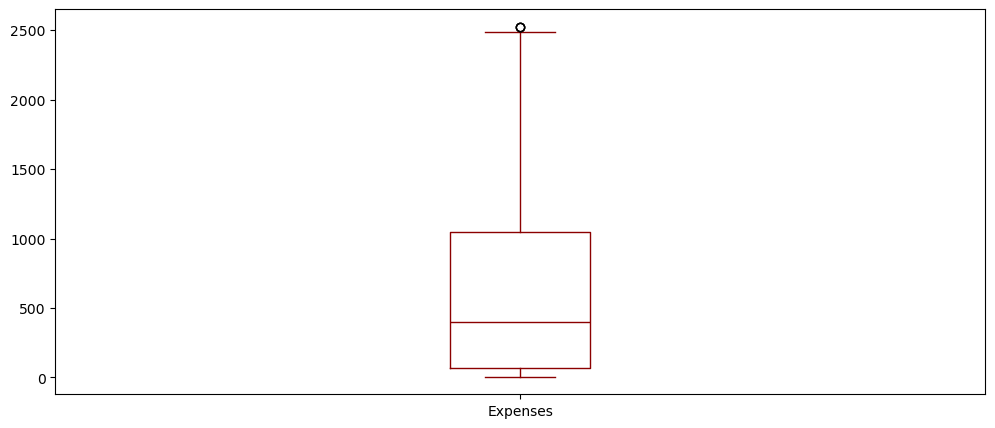

In [426]:
plt.figure(figsize=(12,5))
sns.distplot(df["Expenses"], color = 'darkorange')
plt.show()

df["Expenses"].plot.box(figsize=(12,5), color='darkred')
plt.show()

### Analysis on "AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5" Variable.

In [428]:
df['AcceptedCmp1'].unique()

array([0, 1])

In [429]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [430]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,TotalAcceptedCmp
0,5524,1957,Post Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,1,0,1617,0
1,2174,1954,Post Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,0,2,27,0
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,0,0,776,0
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,0,1,53,0
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,0,1,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Post Graduate,Relationship,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,0,1,1341,0
2236,4001,1946,Post Graduate,Relationship,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,0,3,444,1
2237,7270,1981,Post Graduate,Single,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,0,0,1241,1
2238,8235,1956,Post Graduate,Relationship,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,0,1,843,0


Unique categories present in the TotalAcceptedCmp: TotalAcceptedCmp
0    1777
1     325
2      83
3      44
4      11
Name: count, dtype: int64




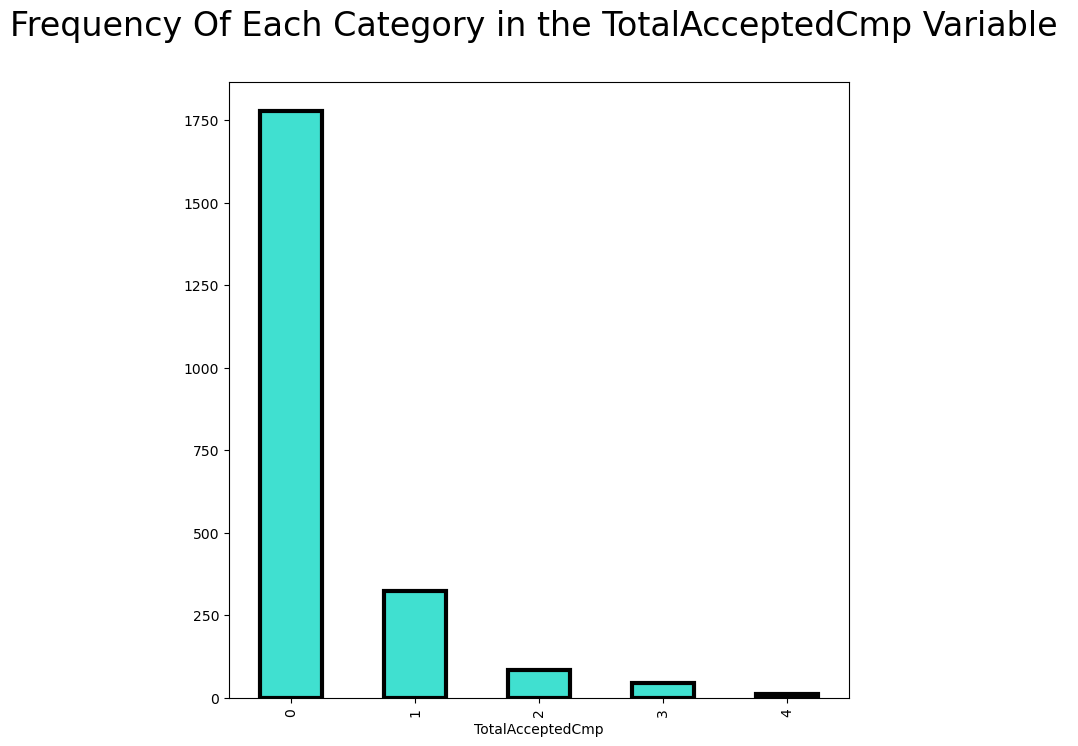

In [431]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "TotalAcceptedCmp"
print("Unique categories present in the TotalAcceptedCmp:",df['TotalAcceptedCmp'].value_counts())
print("\n")


plt.figure(figsize=(8,8))
df['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n",fontsize=24)
plt.show()

In [432]:
accept_counts = df["TotalAcceptedCmp"].value_counts()
accp_percentages = accept_counts / len(df) * 100
print(accp_percentages)

TotalAcceptedCmp
0    79.330357
1    14.508929
2     3.705357
3     1.964286
4     0.491071
Name: count, dtype: float64


### Analysis on "NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases" Variable.

In [434]:
df['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25])

In [435]:
df['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22])

In [436]:
df['NumStorePurchases'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1])

In [437]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44])

In [438]:
df[['NumTotalPurchases']]

,NumTotalPurchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


In [439]:
df['NumTotalPurchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/1161364916.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=color_palette)


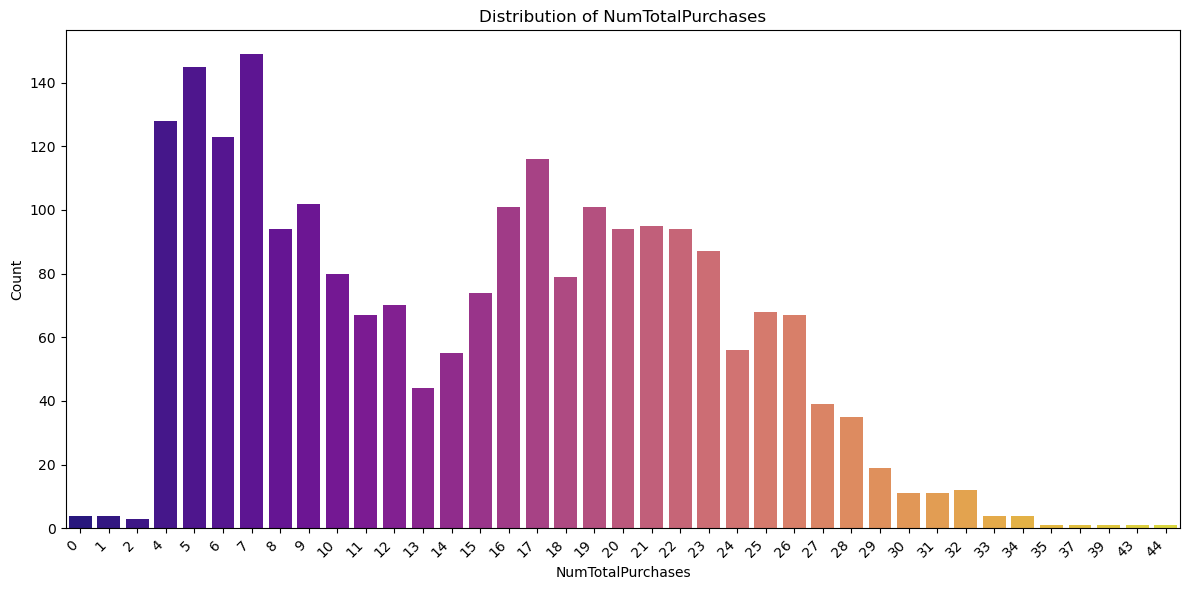

In [440]:
plot_value_counts(df, "NumTotalPurchases", color_palette='plasma')

In [441]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Post Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,1,0,1617,0,25
1,2174,1954,Post Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,2,27,0,6
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,0,776,0,21
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,1,53,0,8
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,1,422,0,19


### Converting the Year_Birth to customer_Age , to know customers' age

In [443]:
df['Customer_Age'] = (pd.Timestamp('now').year) - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,5524,1957,Post Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,1,0,1617,0,25,68
1,2174,1954,Post Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,2,27,0,6,71
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,776,0,21,60
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,1,53,0,8,41
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,1,422,0,19,44


/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/1161364916.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=color_palette)


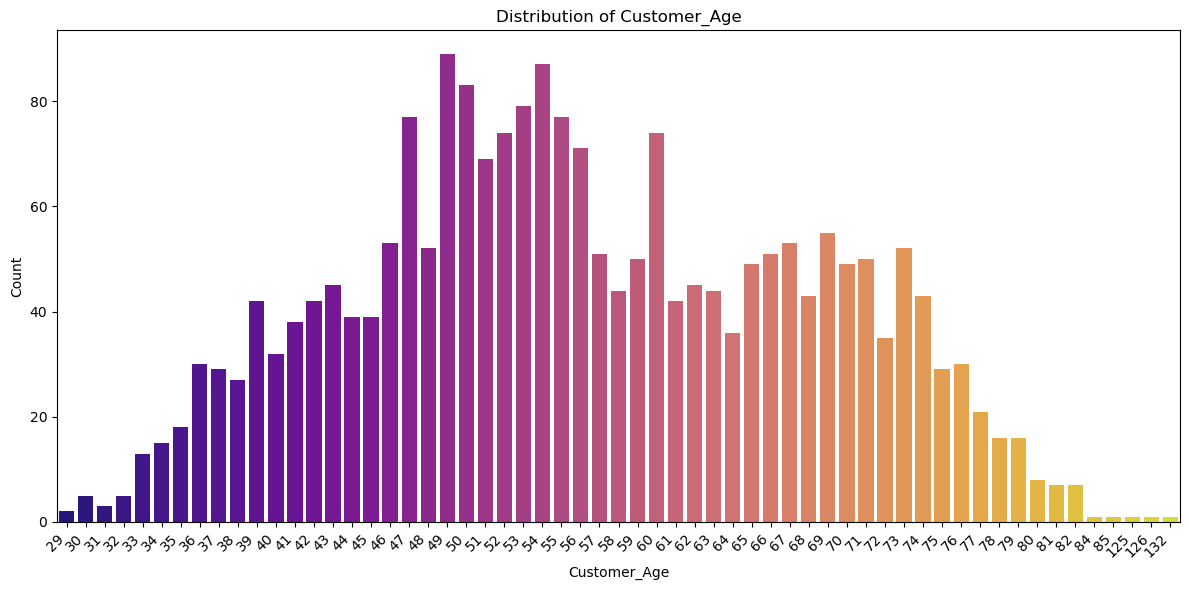

In [444]:
plot_value_counts(df, "Customer_Age", color_palette='plasma')

In [445]:
df_over_100 = df[df["Customer_Age"] > 100]  # Find customers whose age is greater than 100
print(df_over_100)

        ID  Year_Birth      Education Marital_Status   Income  Kidhome  \
192   7829        1900  Post Graduate         Single  36640.0        1   
239  11004        1893  Post Graduate         Single  60182.0        0   
339   1150        1899  Post Graduate   Relationship  83532.0        0   

     Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
192         0  26-09-2013       99        15  ...             0             0   
239         1  17-05-2014       23         8  ...             0             0   
339         0  26-09-2013       36       755  ...             1             0   

     AcceptedCmp2  Complain  Response  Kids  Expenses  TotalAcceptedCmp  \
192             0         1         0     1        65                 0   
239             0         0         0     1        22                 0   
339             0         0         0     0      1853                 1   

     NumTotalPurchases  Customer_Age  
192                  6           125  

 ### Keep only reasonable ages

In [447]:
df = df[df["Customer_Age"] <= 100].reset_index(drop=True)

# either flag them as suspicious ages
# df["Age_Flag"] = df["Customer_Age"] > 100   

In [448]:
df['Customer_Age'].describe()

count    2237.000000
mean       56.098346
std        11.701917
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max        85.000000
Name: Customer_Age, dtype: float64

### Deleting some columns to reduce dimension and complexity of model


In [450]:
col_del = ["Year_Birth",
           "ID",
           "AcceptedCmp1" ,"AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5",
           "NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , 
           "Kidhome", "Teenhome",
           "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

In [451]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,Post Graduate,Single,58138.0,04-09-2012,58,0,1,0,1617,0,25,68
1,Post Graduate,Single,46344.0,08-03-2014,38,0,0,2,27,0,6,71
2,Post Graduate,Relationship,71613.0,21-08-2013,26,0,0,0,776,0,21,60
3,Post Graduate,Relationship,26646.0,10-02-2014,26,0,0,1,53,0,8,41
4,Post Graduate,Relationship,58293.0,19-01-2014,94,0,0,1,422,0,19,44


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2237 non-null   object 
 1   Marital_Status     2237 non-null   object 
 2   Income             2237 non-null   float64
 3   Dt_Customer        2237 non-null   object 
 4   Recency            2237 non-null   int64  
 5   Complain           2237 non-null   int64  
 6   Response           2237 non-null   int64  
 7   Kids               2237 non-null   int64  
 8   Expenses           2237 non-null   int64  
 9   TotalAcceptedCmp   2237 non-null   int64  
 10  NumTotalPurchases  2237 non-null   int64  
 11  Customer_Age       2237 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 209.8+ KB


#### In the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. 

#### However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

#### Thus to get the values I must check the newest and oldest recorded dates.

In [458]:
df['Dt_Customer']         


0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2232    13-06-2013
2233    10-06-2014
2234    25-01-2014
2235    24-01-2014
2236    15-10-2012
Name: Dt_Customer, Length: 2237, dtype: object

In [460]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%d-%m-%Y', errors='coerce')

dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)

# Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:", max(dates))
print("The oldest customer's enrolment date in the records:", min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


#### find the row corresponding to the newest customer's enrollment date 

In [471]:
newest_date = pd.to_datetime('2014-06-29').date() 
newest_customer_row = df[df['Dt_Customer'].dt.date == newest_date]
print(newest_customer_row)

         Education Marital_Status   Income Dt_Customer  Recency  Complain  \
199  Post Graduate         Single  69142.0  2014-06-29       50         0   
986  Post Graduate         Single  35340.0  2014-06-29        1         0   

     Response  Kids  Expenses  TotalAcceptedCmp  NumTotalPurchases  \
199         0     1       535                 1                 19   
986         0     2        45                 0                  7   

     Customer_Age  Customer_For  
199            73             0  
986            69             0  


In [464]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,Post Graduate,Single,58138.0,2012-09-04,58,0,1,0,1617,0,25,68
1,Post Graduate,Single,46344.0,2014-03-08,38,0,0,2,27,0,6,71
2,Post Graduate,Relationship,71613.0,2013-08-21,26,0,0,0,776,0,21,60
3,Post Graduate,Relationship,26646.0,2014-02-10,26,0,0,1,53,0,8,41
4,Post Graduate,Relationship,58293.0,2014-01-19,94,0,0,1,422,0,19,44


##### Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [467]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df['Customer_For'] = df['Customer_For'].apply(lambda x:x.days)

In [469]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Post Graduate,Single,58138.0,2012-09-04,58,0,1,0,1617,0,25,68,663
1,Post Graduate,Single,46344.0,2014-03-08,38,0,0,2,27,0,6,71,113
2,Post Graduate,Relationship,71613.0,2013-08-21,26,0,0,0,776,0,21,60,312
3,Post Graduate,Relationship,26646.0,2014-02-10,26,0,0,1,53,0,8,41,139
4,Post Graduate,Relationship,58293.0,2014-01-19,94,0,0,1,422,0,19,44,161


In [474]:
df['Customer_For'].describe()

count    2237.000000
mean      353.790344
std       202.137961
min         0.000000
25%       181.000000
50%       356.000000
75%       529.000000
max       699.000000
Name: Customer_For, dtype: float64

In [478]:
df.drop(['Dt_Customer','Recency','Complain','Response'],axis=1,inplace=True)

In [480]:
df

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Post Graduate,Single,58138.0,0,1617,0,25,68,663
1,Post Graduate,Single,46344.0,2,27,0,6,71,113
2,Post Graduate,Relationship,71613.0,0,776,0,21,60,312
3,Post Graduate,Relationship,26646.0,1,53,0,8,41,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,44,161
...,...,...,...,...,...,...,...,...,...
2232,Post Graduate,Relationship,61223.0,1,1341,0,18,58,381
2233,Post Graduate,Relationship,64014.0,3,444,1,22,79,19
2234,Post Graduate,Single,56981.0,0,1241,1,19,44,155
2235,Post Graduate,Relationship,69245.0,1,843,0,23,69,156


/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/372637417.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Customer_For"], color='turquoise')


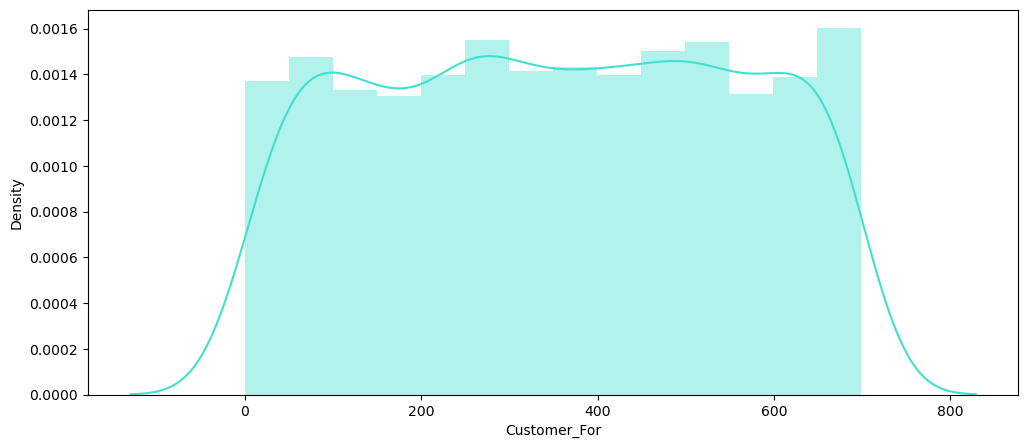

In [482]:
plt.figure(figsize=(12, 5))
sns.distplot(df["Customer_For"], color='turquoise')
plt.show()

In [486]:
df.shape

(2237, 9)

### Bivariate Analysis :-

#### Education vs Expenses

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/1967873046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Education", y="Expenses", data=df,palette="rainbow")


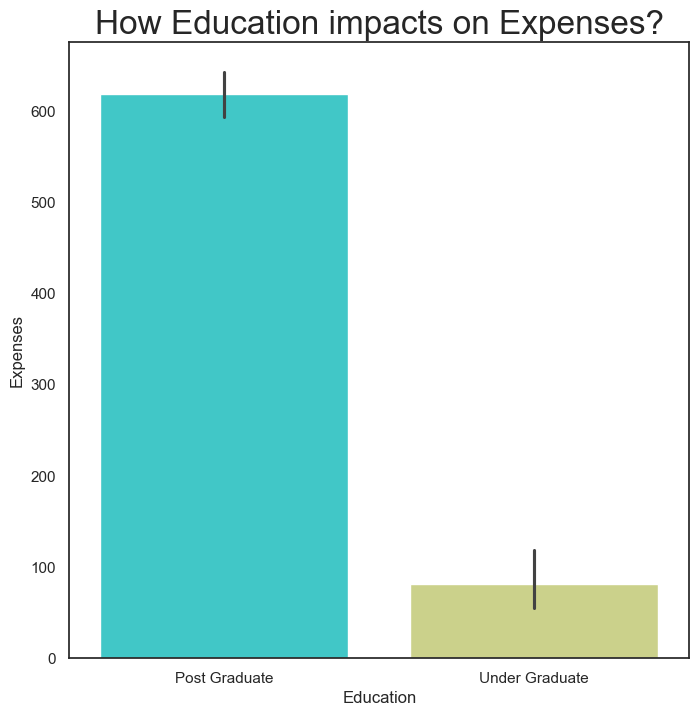

In [489]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Education impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=df,palette="rainbow")

-- We observe that the post graduated people spends more than the UG people

#### Marital status vs Expenses

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/3359531552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Marital_Status", y="Expenses", data=df,palette="rainbow")


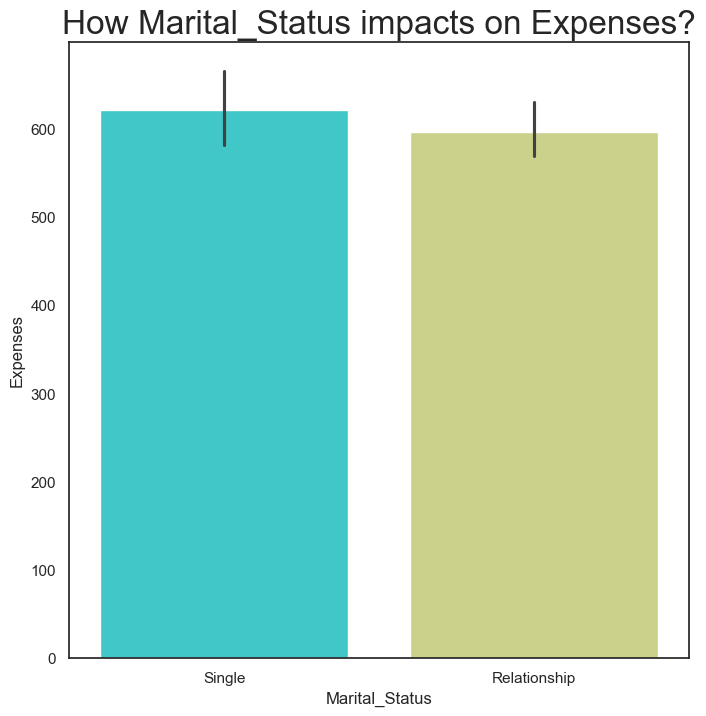

In [494]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Marital_Status impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=df,palette="rainbow")

-- have almost the same spendings.

#### Kids vs Expenses

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/1584552544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Kids", y="Expenses", data=df,palette="rainbow")


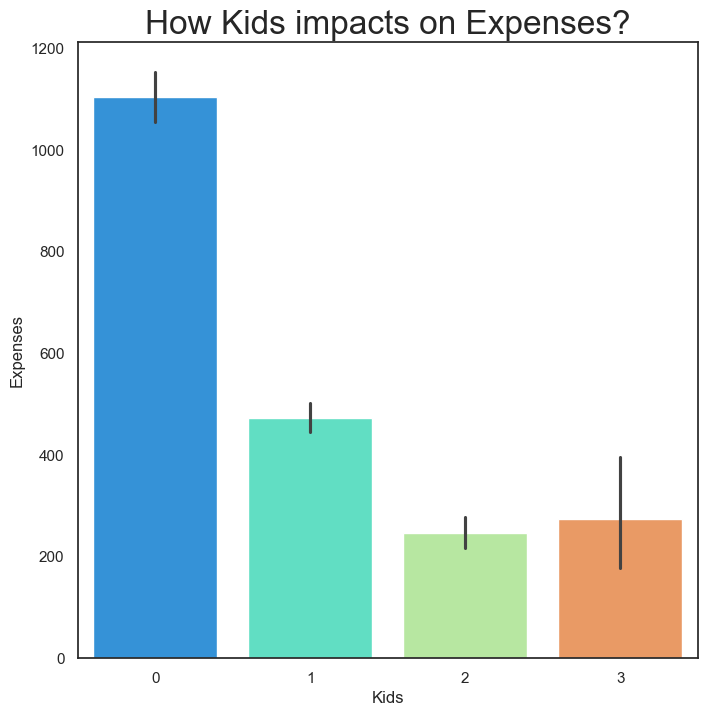

In [498]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Kids impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Kids", y="Expenses", data=df,palette="rainbow")

-- parents with 1 kid spends more than the parents who are having 2 or 3 kids

#### TotalAcceptedCmp vs Expenses

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/3031530074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="TotalAcceptedCmp", y="Expenses", data=df,palette="rainbow")


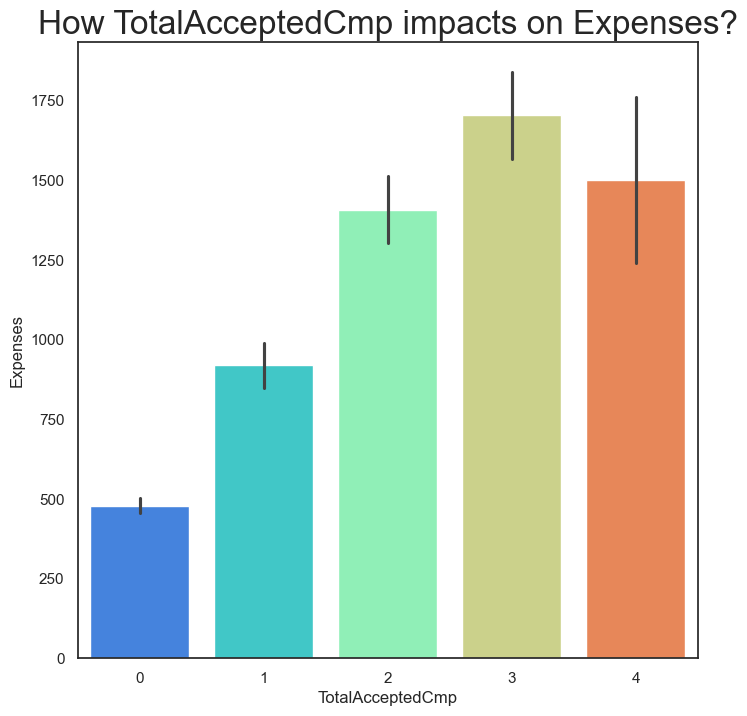

In [503]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How TotalAcceptedCmp impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="TotalAcceptedCmp", y="Expenses", data=df,palette="rainbow")

-- those who accepeted more campaign have more expenses

#### NumTotalPurchases vs Expenses

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/1287179970.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="NumTotalPurchases", y="Expenses", data=df,palette="rainbow")


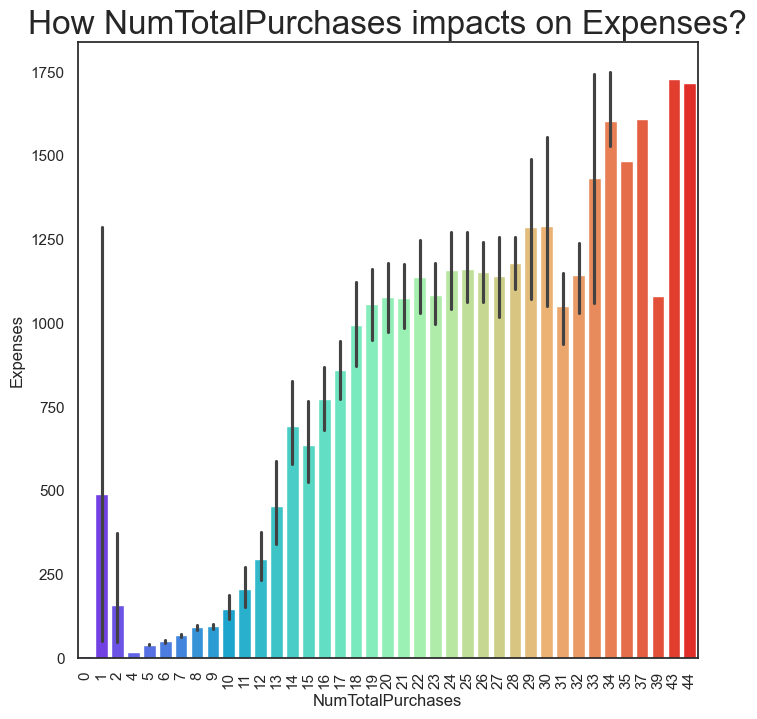

In [507]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How NumTotalPurchases impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="NumTotalPurchases", y="Expenses", data=df,palette="rainbow")

#### Day engaged vs Expenses

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/4283764495.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x="Customer_For", y="Expenses", data=df,palette="rainbow")


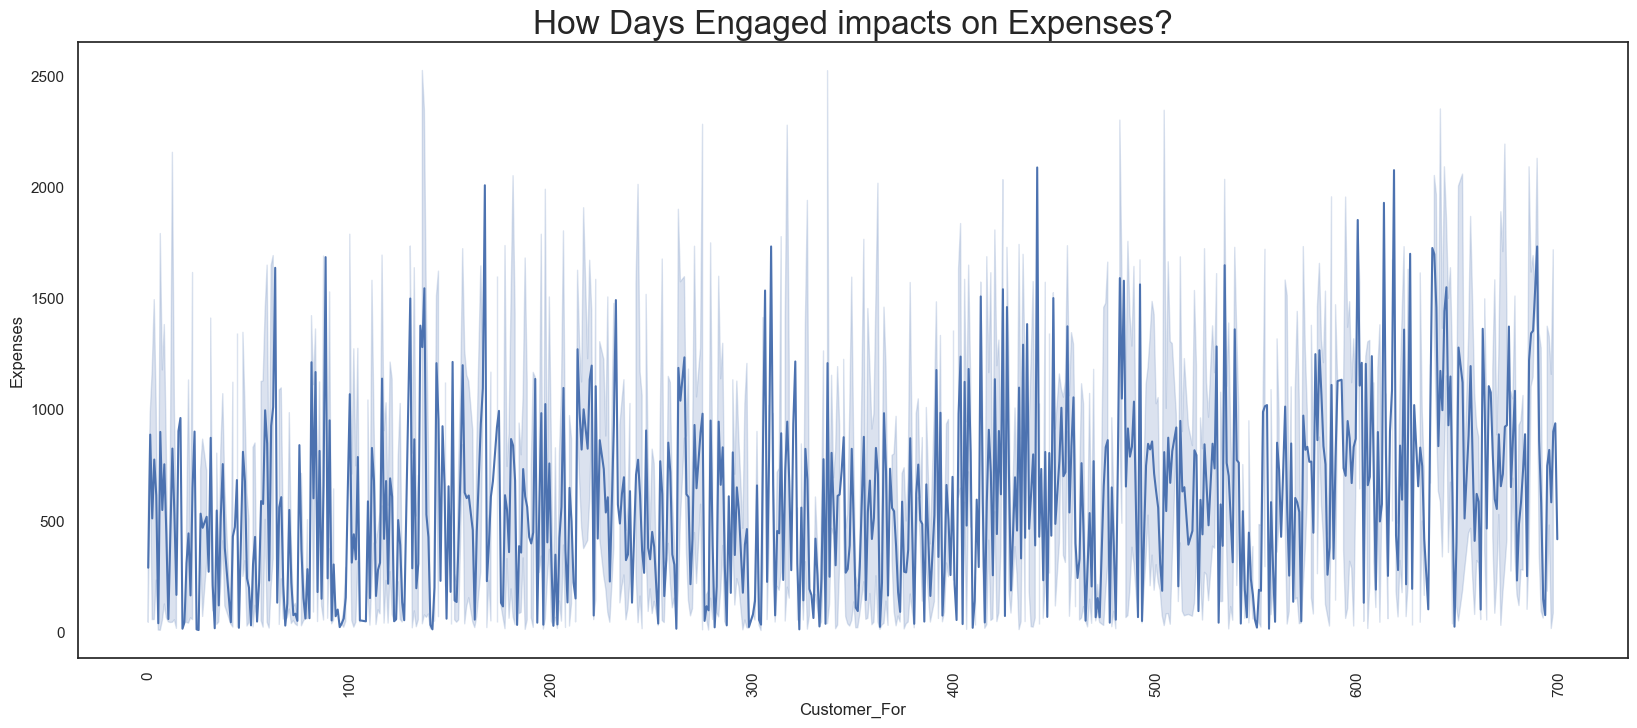

In [510]:
sns.set_theme(style="white")
plt.figure(figsize=(20,8))
plt.title("How Days Engaged impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.lineplot(x="Customer_For", y="Expenses", data=df,palette="rainbow")

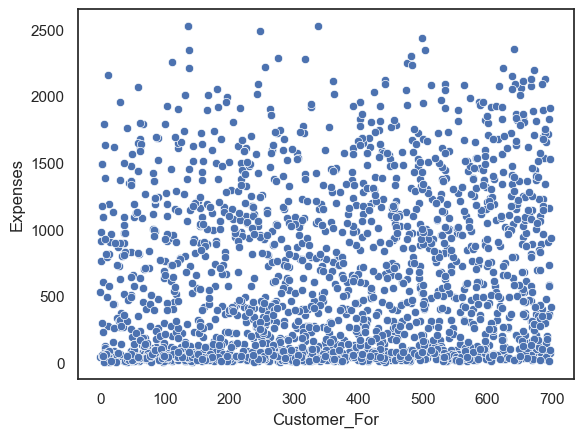

In [514]:
sns.scatterplot(x=df['Customer_For'], y=df['Expenses'])
plt.show()

##### No relationship between days enagaged vs expenses

#### Customer Age vs Expenses

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/2248069896.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Customer_Age", y="Expenses", data=df,palette="rainbow")


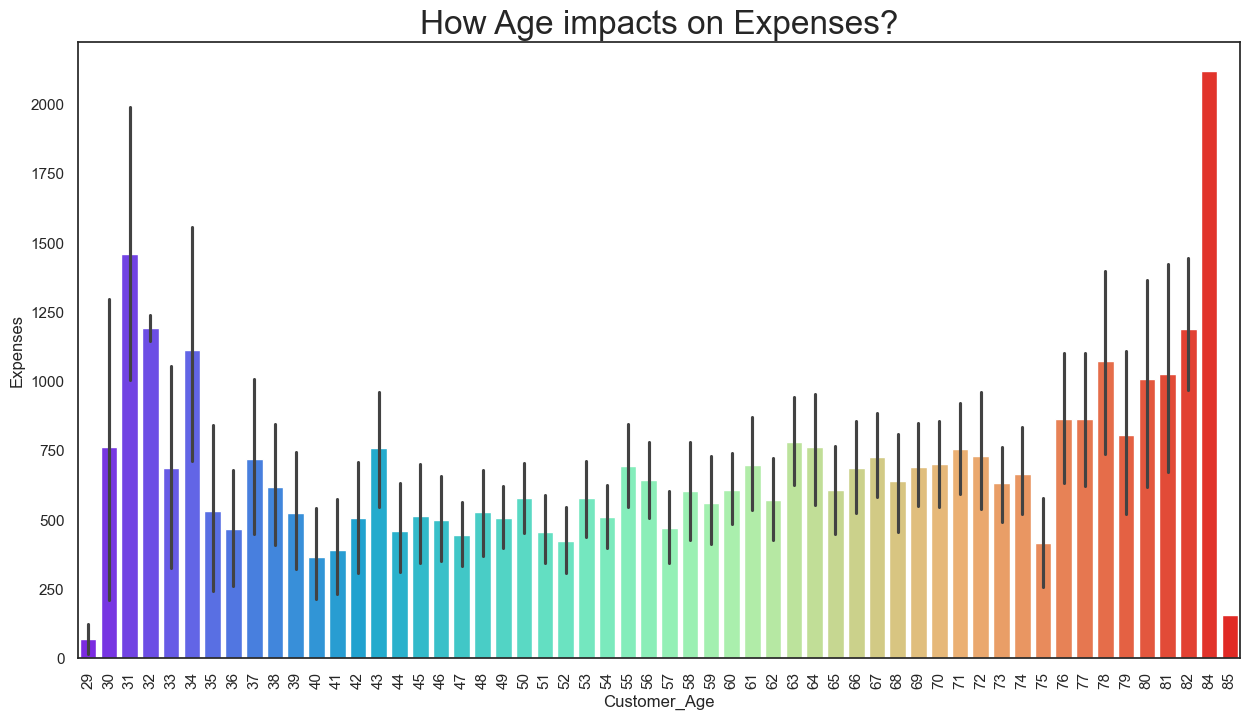

In [518]:
sns.set_theme(style="white")
plt.figure(figsize=(15,8))
plt.title("How Age impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="Customer_Age", y="Expenses", data=df,palette="rainbow")

plt.show()

-- People who are in middle age have less spending than others

### Remove some outliers present in age and income

In [522]:
df['Income'].describe()

count      2237.000000
mean      52227.407689
std       25043.266830
min        1730.000000
25%       35523.000000
50%       51381.500000
75%       68281.000000
max      666666.000000
Name: Income, dtype: float64

In [524]:
df = df[df['Income'] < 300000]

In [526]:
df.shape

(2236, 9)

### Finding the correlation:-

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2236
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2236 non-null   object 
 1   Marital_Status     2236 non-null   object 
 2   Income             2236 non-null   float64
 3   Kids               2236 non-null   int64  
 4   Expenses           2236 non-null   int64  
 5   TotalAcceptedCmp   2236 non-null   int64  
 6   NumTotalPurchases  2236 non-null   int64  
 7   Customer_Age       2236 non-null   int64  
 8   Customer_For       2236 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 174.7+ KB


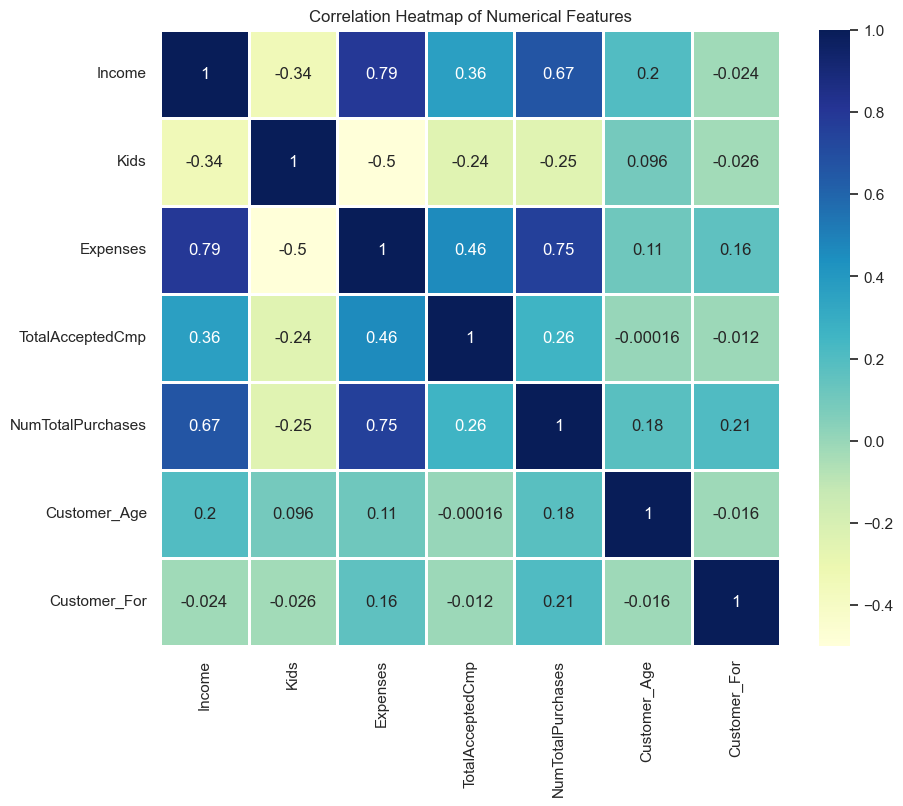

In [539]:
plt.figure(figsize=(10, 8))

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

-- Income is more positively correlated to Expenses and Number of purchases

-- Expenses is positively correlated to Income and Number of pur chases and negitively correlated with Kids

### Model building part 

In [543]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Post Graduate,Single,58138.0,0,1617,0,25,68,663
1,Post Graduate,Single,46344.0,2,27,0,6,71,113
2,Post Graduate,Relationship,71613.0,0,776,0,21,60,312
3,Post Graduate,Relationship,26646.0,1,53,0,8,41,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,44,161


### Import label encoder


In [546]:
from sklearn import preprocessing
  

In [548]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/2657637152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'] = label_encoder.fit_transform(df['Education'])
/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/2657637152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])


In [550]:
df['Education'].unique()

# array(['Post Graduate', 'Under Graduate']

array([0, 1])

In [554]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Customer_Age',
       'Customer_For'],
      dtype='object')

In [556]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,0,1,58138.0,0,1617,0,25,68,663
1,0,1,46344.0,2,27,0,6,71,113
2,0,0,71613.0,0,776,0,21,60,312
3,0,0,26646.0,1,53,0,8,41,139
4,0,0,58293.0,1,422,0,19,44,161


#### Scaling on these columns ['Income', 'Kids', 'Expenses','TotalAcceptedCmp', 'NumTotalPurchases', 'Customer_Age', 'Customer_For']


In [563]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # define the method first 

col_scale = ['Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Customer_Age', 'Customer_For']

df[col_scale] = scaler.fit_transform(df[col_scale])

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_54202/1258074001.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_scale] = scaler.fit_transform(df[col_scale])


In [565]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868,1.529793
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264,-1.191143
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146,-0.206659
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693,-1.062517
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298,-0.953679


### K-Means

In [568]:
X_0 = df.copy()

In [570]:
from sklearn.cluster import KMeans

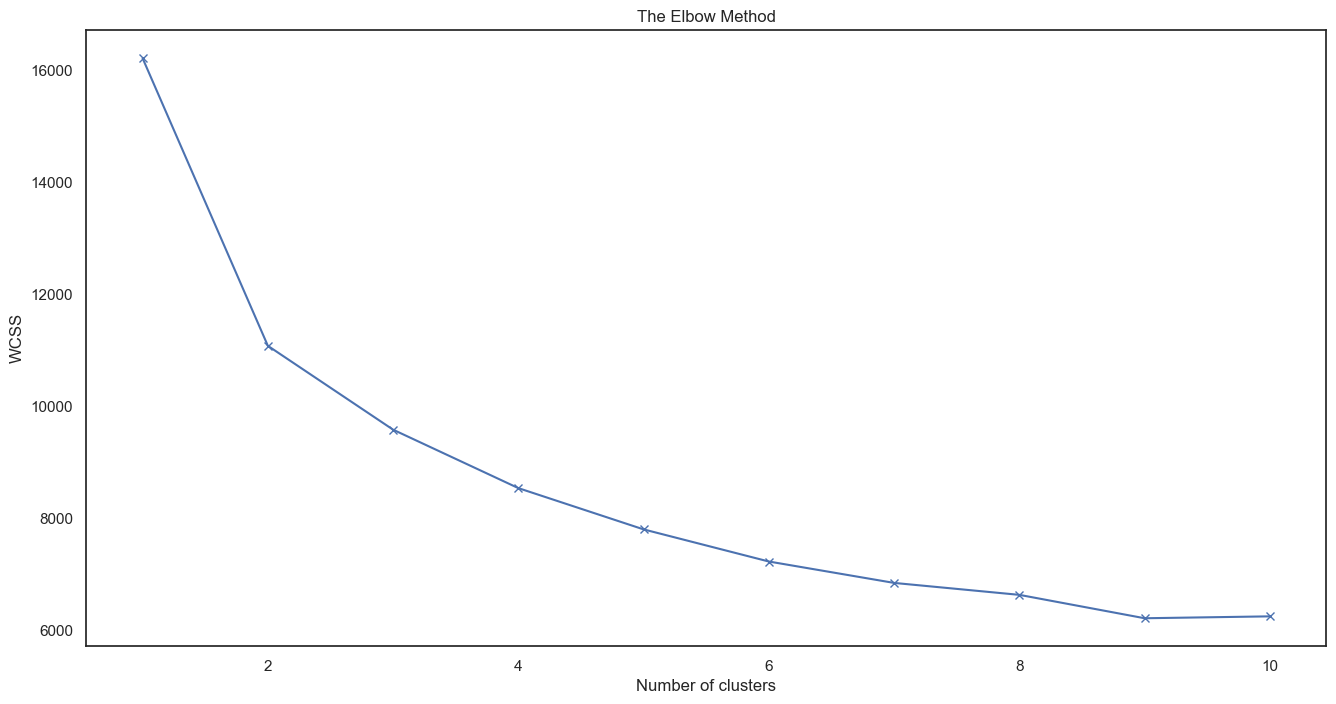

In [572]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_0)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### use the plot that cluster = 2 is the best

In [575]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=2, random_state=42).fit(X_0)
pred=kmeans.predict(X_0)


# Appending those cluster value into main dataframe (without standard-scalar)

X_0['cluster_Kmeans'] = pred + 1 

## adding +1 just to  just a way to make the labels start from 1 instead of 0, 
## which feels more natural when we talk about groups or categories.

In [577]:
X_0.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For,cluster_Kmeans
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868,1.529793,2
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264,-1.191143,1
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146,-0.206659,2
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693,-1.062517,1
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298,-0.953679,1


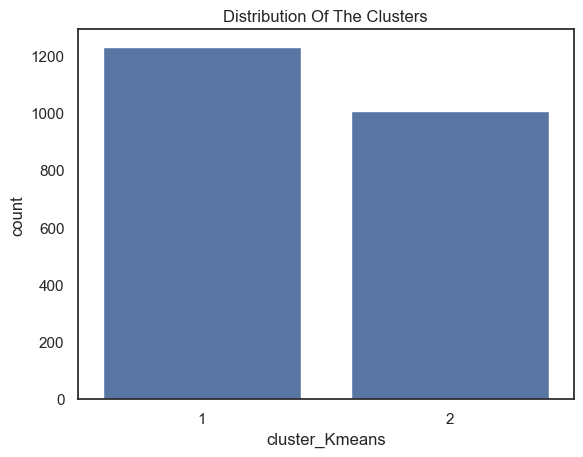

In [579]:
sns.countplot(x=X_0["cluster_Kmeans"])
plt.title("Distribution Of The Clusters")
plt.show()

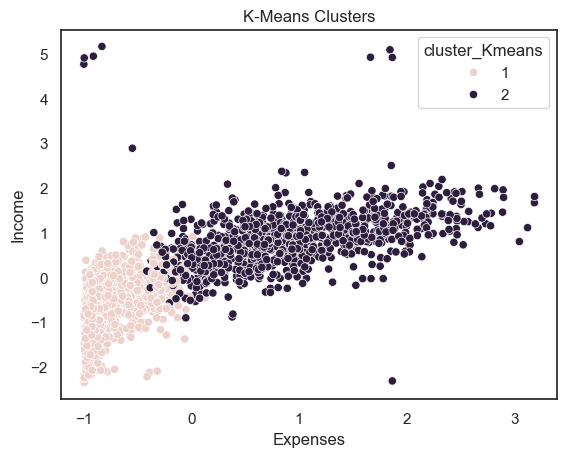

In [583]:
sns.scatterplot(x=X_0['Expenses'], y=X_0['Income'], hue=X_0['cluster_Kmeans'])
plt.title('K-Means Clusters')
plt.xlabel('Expenses')
plt.ylabel('Income')
plt.show()

#### People who spend less are falling to the left cluster in oppose to right cluster.

In [586]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868,1.529793
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264,-1.191143
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146,-0.206659
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693,-1.062517
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298,-0.953679


In [588]:
X_1 = df.copy()

In [590]:
X_1.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868,1.529793
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264,-1.191143
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146,-0.206659
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693,-1.062517
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298,-0.953679


In [592]:
from sklearn.decomposition import PCA
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(X_1)
PCA_ds = pd.DataFrame(pca.transform(X_1), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,2.065531e-17,1.727875,-2.781513,-1.605133,-0.256193,1.383609,5.653584
col2,2236.0,-4.607723e-17,1.063303,-2.899452,-0.792535,-0.006992,0.732501,3.637695
col3,2236.0,-3.257184e-17,1.027762,-2.221347,-0.851926,0.004863,0.819979,2.778722


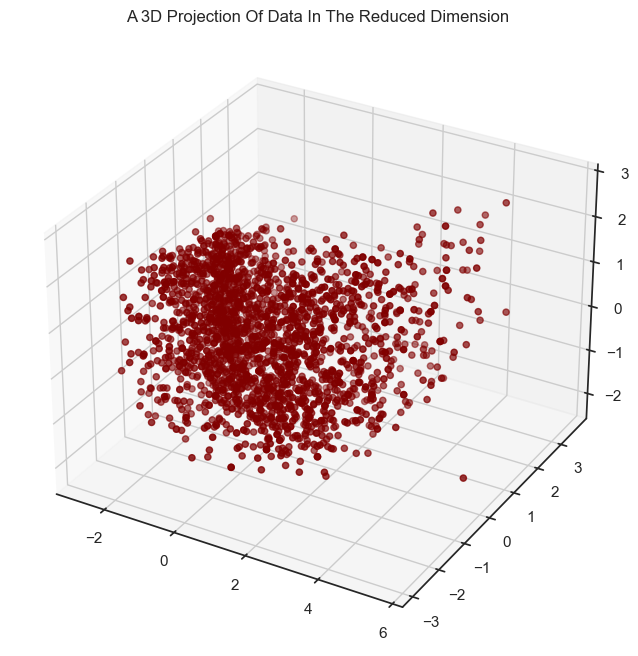

In [594]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")

plt.show()

In [596]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


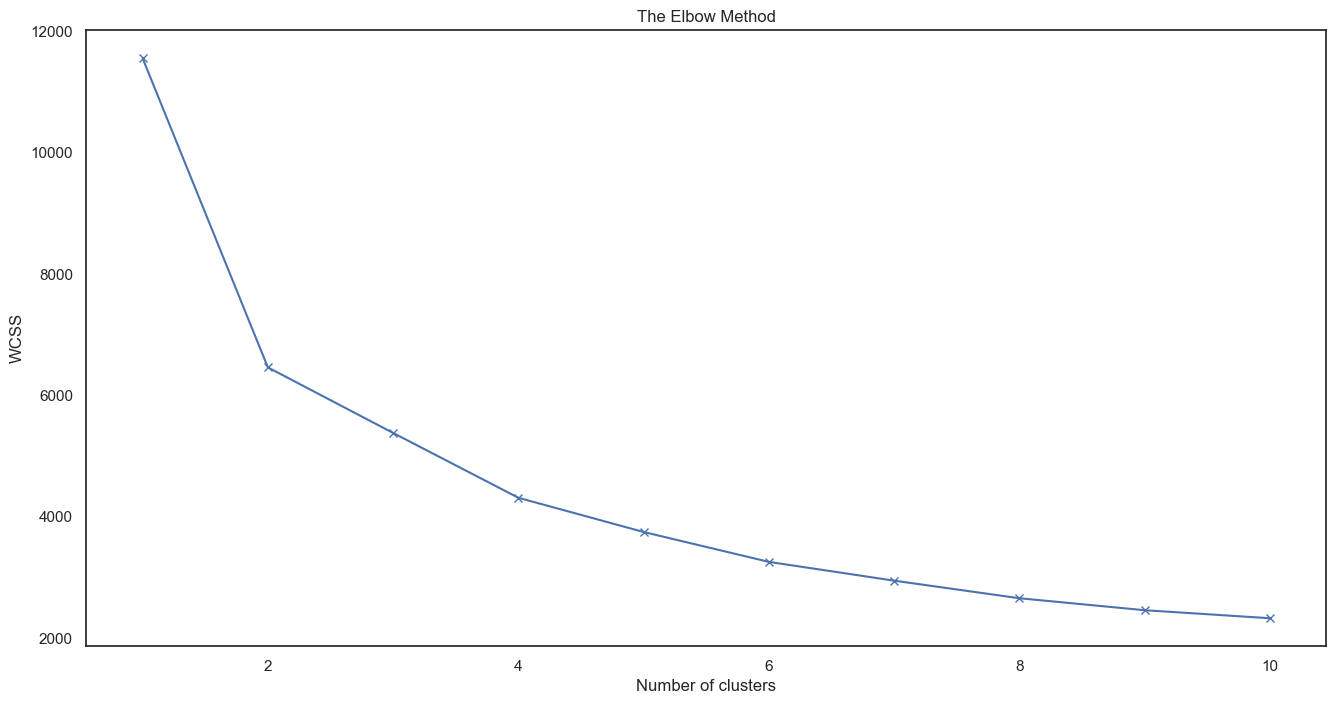

In [598]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### AFTER PERFORMING PCA WE HAVE REDUCE ERRORS TO 6K FROM 11K IN ELBOW

In [601]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
X_1["Cluster_Agglo"]= yhat_AC + 1

In [607]:
X_1.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For,Cluster_Agglo
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868,1.529793,1
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264,-1.191143,2
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146,-0.206659,1
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693,-1.062517,2
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298,-0.953679,2


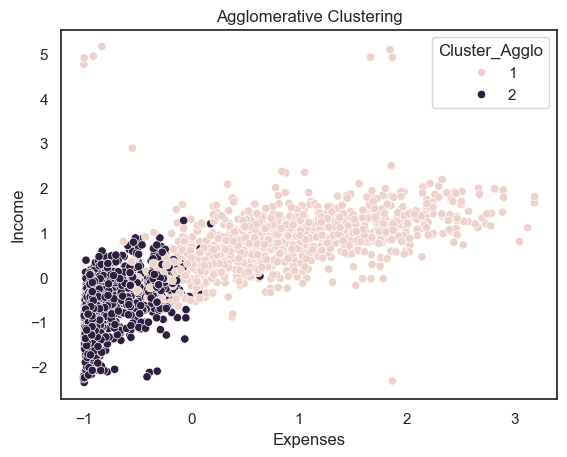

In [605]:
sns.scatterplot(x=X_1['Expenses'], y=X_1['Income'], hue=X_1['Cluster_Agglo'])
plt.title('Agglomerative Clustering')
plt.xlabel('Expenses')
plt.ylabel('Income')
plt.show()


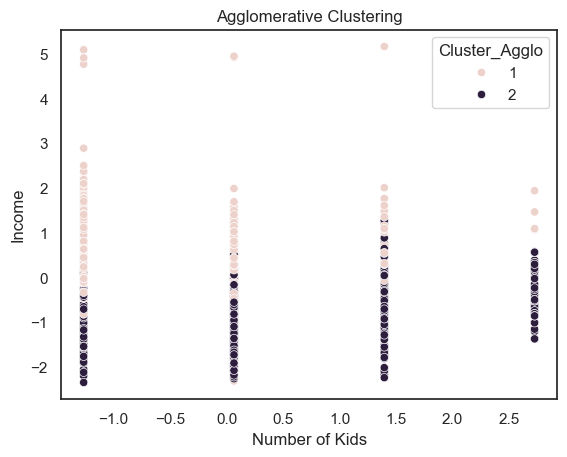

In [611]:
sns.scatterplot(x=X_1['Kids'], y=X_1['Income'], hue=X_1['Cluster_Agglo'])
plt.title('Agglomerative Clustering')
plt.xlabel('Number of Kids')
plt.ylabel('Income')
plt.show()



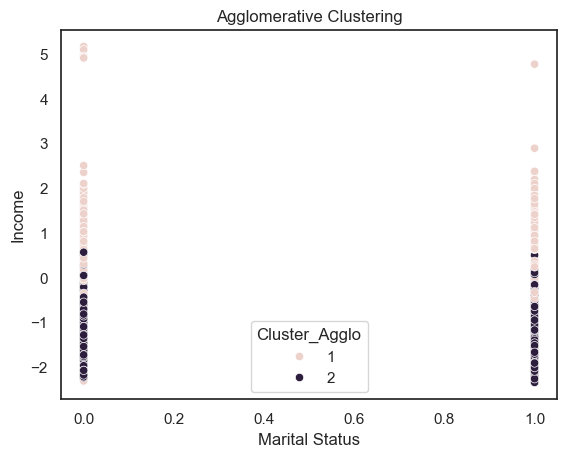

In [615]:
sns.scatterplot(x=X_1['Marital_Status'], y=X_1['Income'], hue=X_1['Cluster_Agglo'])
plt.title('Agglomerative Clustering')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.show()



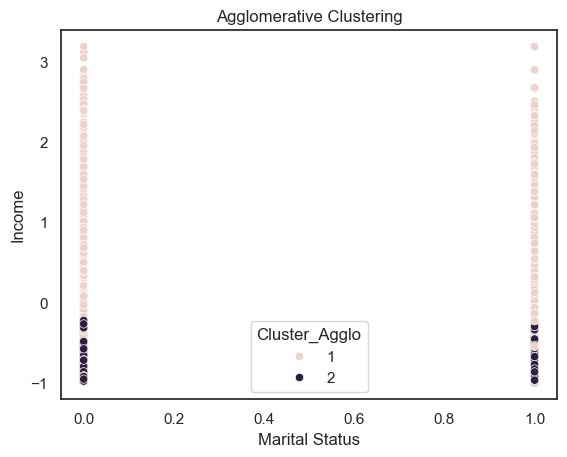

In [623]:
sns.scatterplot(x=X_1['Marital_Status'], y=X_1['Expenses'], hue=X_1['Cluster_Agglo'])
plt.title('Agglomerative Clustering')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.show()



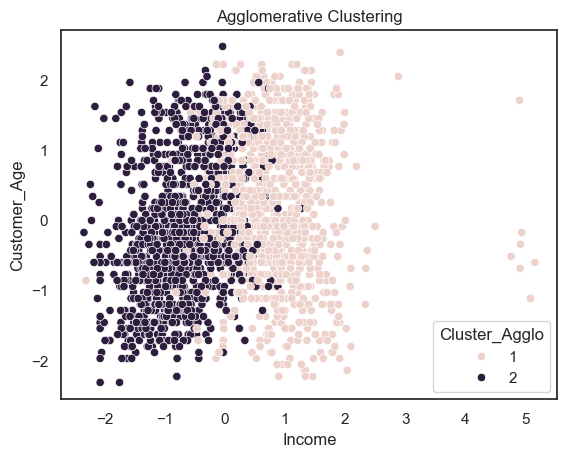

In [617]:
sns.scatterplot(x=X_1['Income'], y=X_1['Customer_Age'], hue=X_1['Cluster_Agglo'])
plt.title('Agglomerative Clustering')
plt.xlabel('Income')
plt.ylabel('Customer_Age')
plt.show()



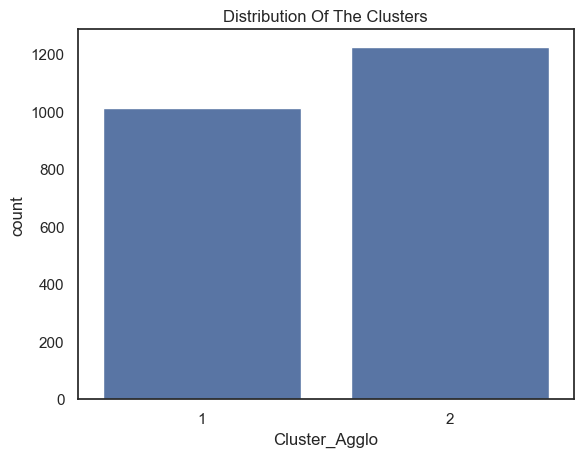

In [619]:
sns.countplot(x=X_1["Cluster_Agglo"])
plt.title("Distribution Of The Clusters")
plt.show()

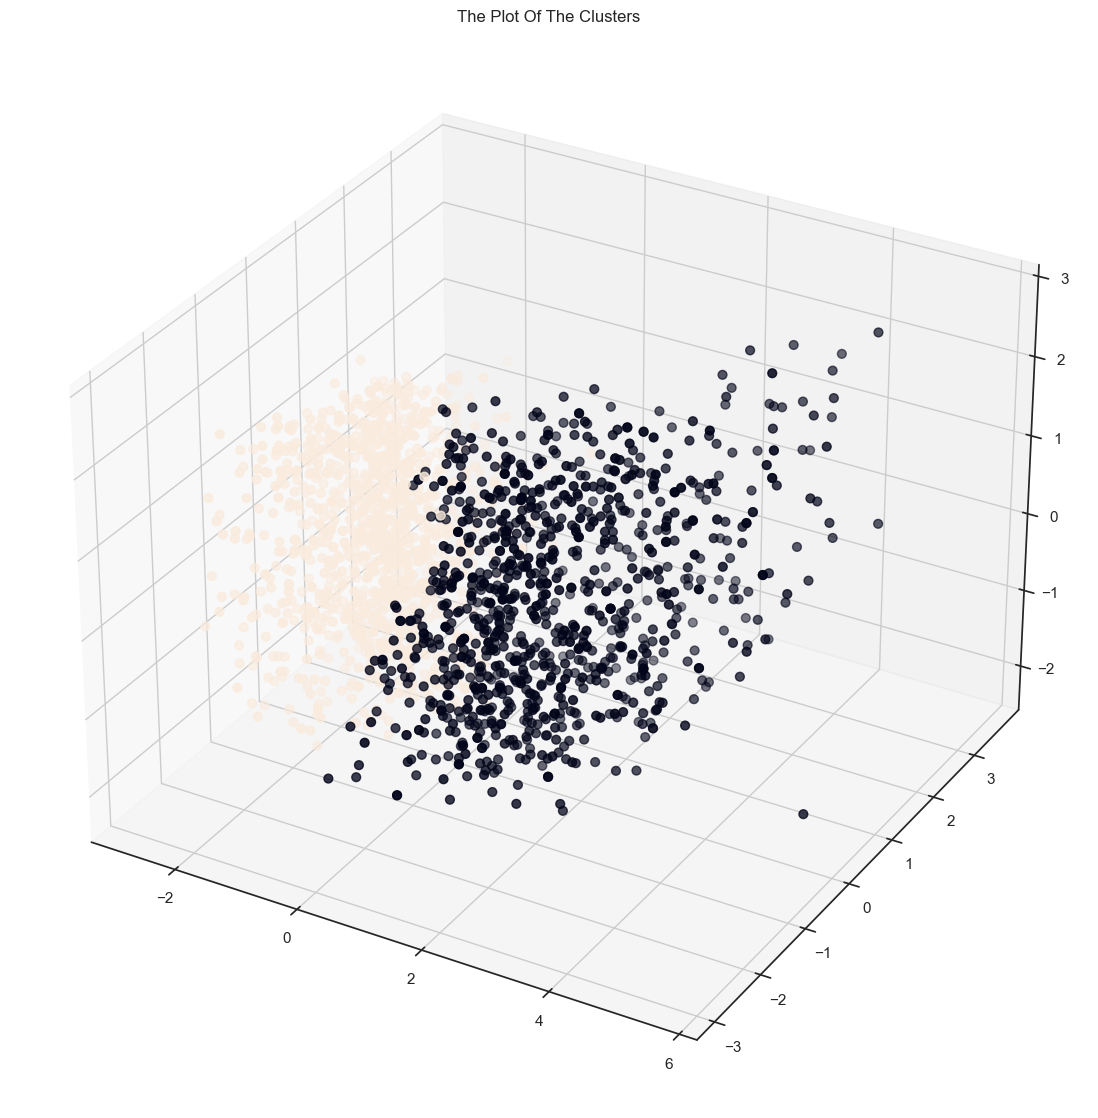

In [621]:
#Plotting the clusters
fig = plt.figure(figsize=(16,14))
ax = plt.subplot(111, projection='3d', label="bla")

ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")

plt.show()

### Cluster 1 (light color) :

#### might represent higher-income individuals with fewer or no kids, possibly single or dual-income households with fewer dependents.


### Cluster 2 (dark color) :

#### might represent lower-income individuals with larger families, potentially married with kids.
	
